<IPython.core.display.Javascript object>


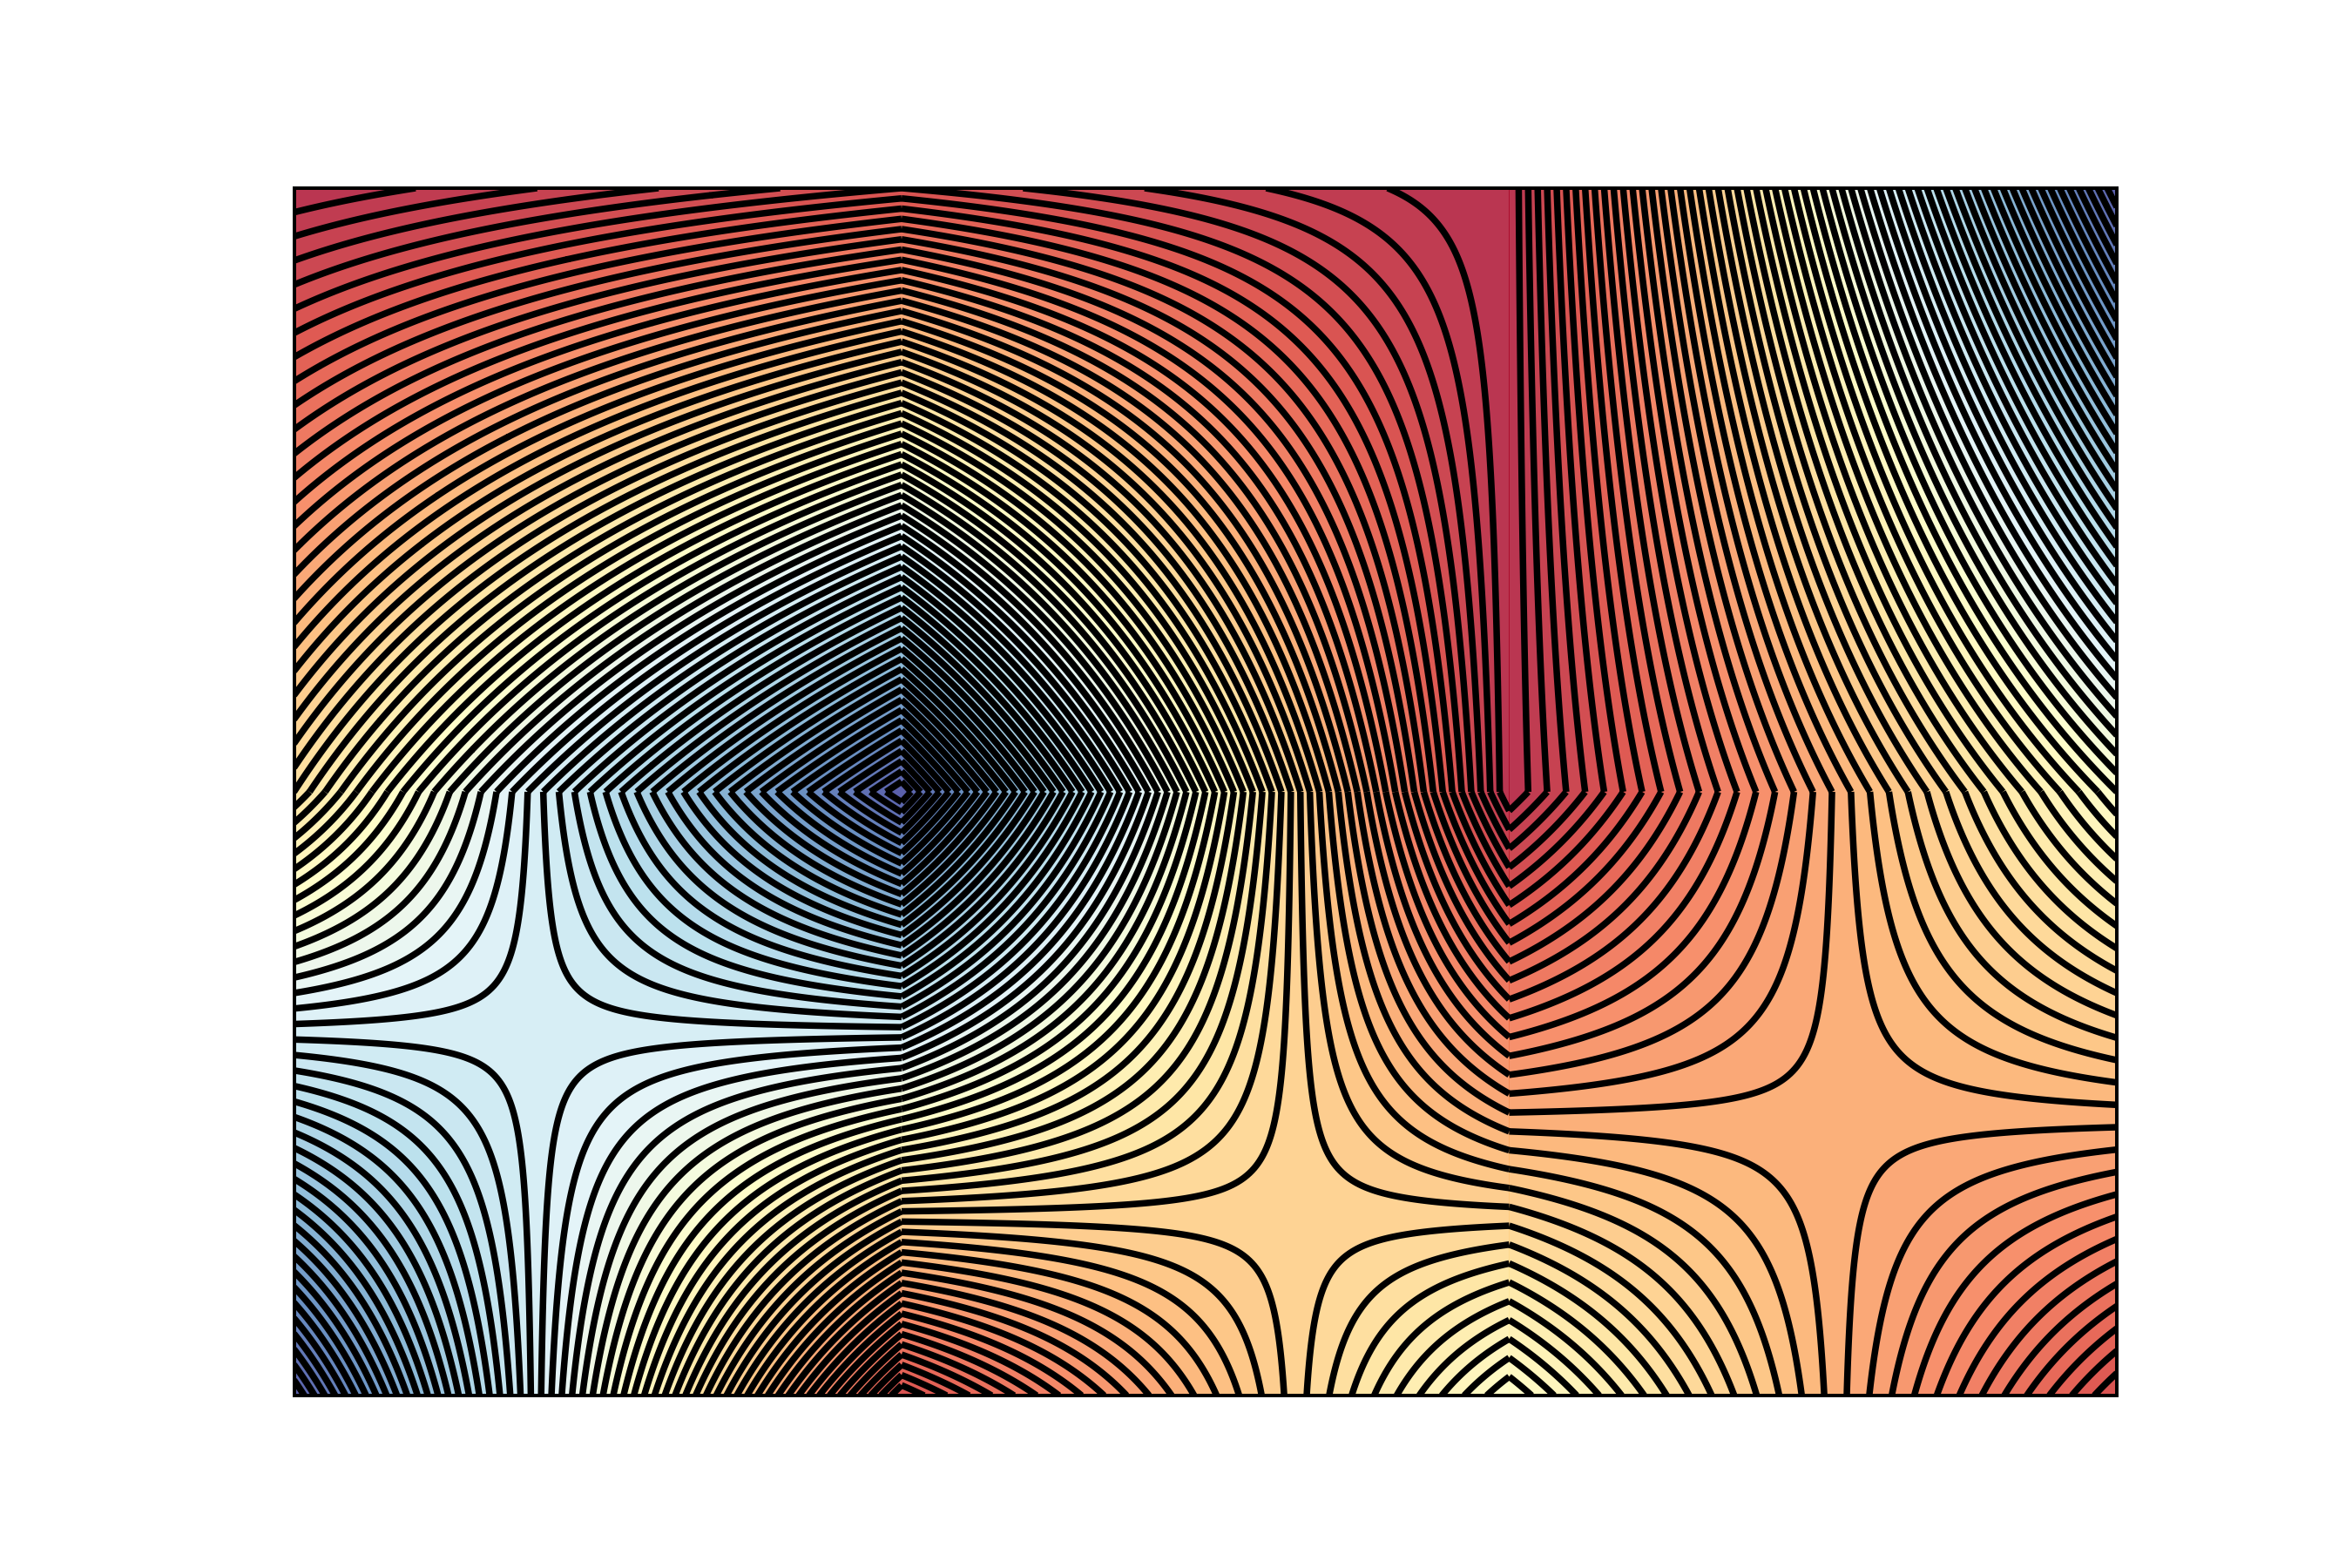

<IPython.core.display.Javascript object>


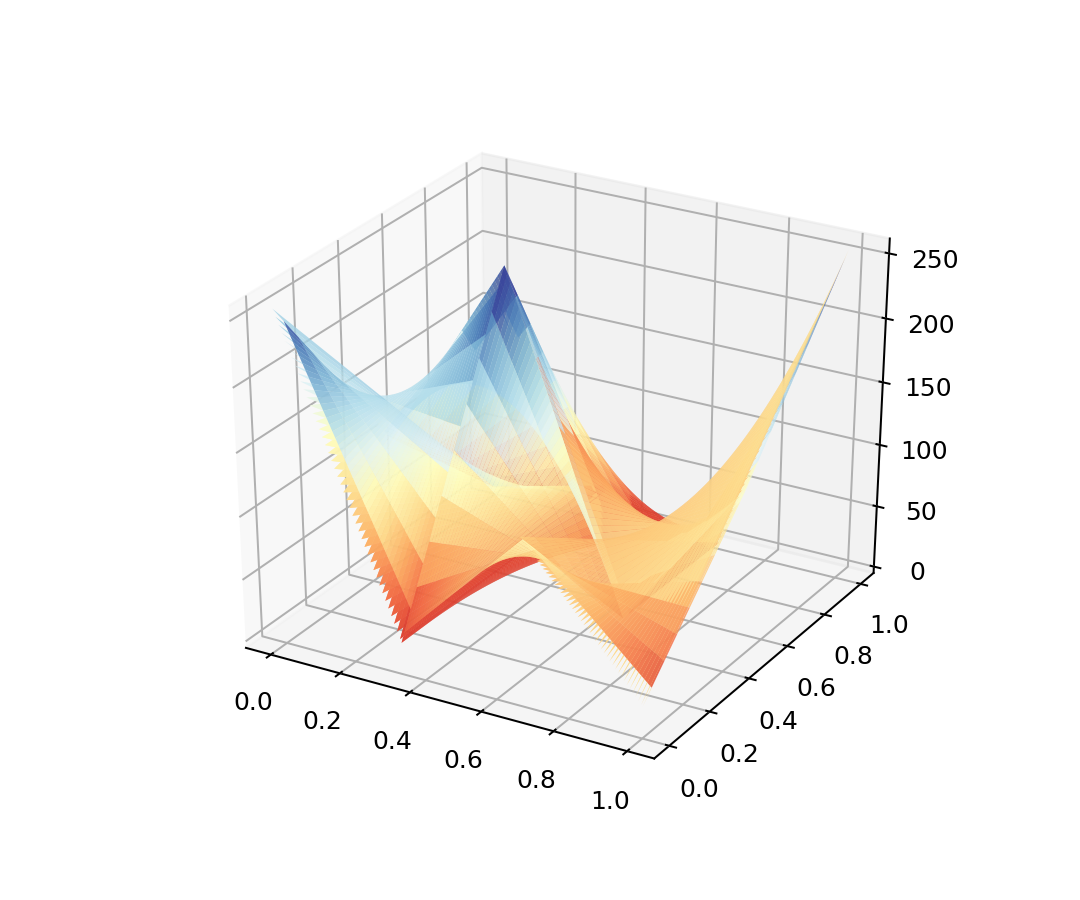

In [201]:
%matplotlib notebook 
#magic comment - enables new interface for generated figures

## BILINEAR INTERPOLATION

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#############################################################################################
# CHANGE ME!
#############################################################################################

numTilesX = 3
numTilesY = 2

# put numValX * numValY values 
#values = [ 256, 256,
#           128, 0 ] 

#values = [ 0, 0, 256,
#           128, 256, 256,
#            256, 100, 0 ] 

values = [   0,  20,   0, 256,
           100, 256,   0, 128, 
           256,  20, 128,  20 ] 

# number of levels drawn in the graph
numlevels = 64
  
#possible colormap values: { plt.cm.viridis, plt.cm.inferno, plt.cm.plasma, plt.cm.magma, plt.cm.YlGnBu, plt.cm.RdYlBu }
#find more colormaps at http://matplotlib.org/users/colormaps.html
colormap = plt.cm.RdYlBu
        
#############################################################################################

numValX = numTilesX + 1
numValY = numTilesY + 1

minval = min(values)
maxval = max(values)

#number of values represented by one level
valuesperlevel = (maxval - minval) / numlevels

#size of one tile
dx = (1.0 / numTilesX)
dy = (1.0 / numTilesY)

#figure size
plt.figure(figsize = (numTilesX * 2.5, numTilesY * 2.5), dpi = 240)

X3D = []
Y3D = []
Z3D = []

# plot the tiles
for tileX in range( 0, numTilesX ):
    for tileY in range( 0, numTilesY ):
        # values at corner of tile
        Q11 = values[(tileY+1) * numValX + tileX]   # Q11 = (x1, y1) - bottom left
        Q12 = values[tileY * numValX + tileX]       # Q12 = (x1, y2) - top left 
        Q21 = values[(tileY+1) * numValX + tileX+1] # Q21 = (x2, y1) - bottom right
        Q22 = values[tileY * numValX + tileX+1]     # Q11 = (x2, y2) - top right
        
        #tile position
        x1 = 0.0 + tileX * dx
        x2 = x1 + dx

        y2 = 1.0 - tileY * dy
        y1 = y2 - dy

        def f_y1(x): #linear interpolation in x-direction at y1 position
            return (x2 - x) / dx * Q11 + (x - x1) / dx * Q21

        def f_y2(x):  #linear interpolation in x-direction at y2 position
            return (x2 - x) / dx * Q12 + (x - x1) / dx * Q22

        def f(x, y): #combine all interpolations
            return (y2 - y) / dy * f_y1(x) + (y - y1) / dy * f_y2(x)

        n = 256
        x = np.linspace(x1, x2, n)
        y = np.linspace(y1, y2, n)
        X,Y = np.meshgrid(x, y)

        #write current values to arrays
        X3D.extend(X)
        Y3D.extend(Y)
        Z3D.extend(f(X,Y))
         
        # evaluate how many levels to plot in current tile
        mincur = min([Q11, Q12, Q21, Q22])  
        maxcur = max([Q11, Q12, Q21, Q22])
        levels = round((maxcur - mincur) / valuesperlevel)
        
        #plot colors for equal values
        plt.contourf(X, Y, f(X, Y), levels, alpha=.8, cmap = colormap, vmin = minval, vmax = maxval)
        
        #show lines in contour plot
        C = plt.contour(X, Y, f(X, Y), levels, colors='black', linewidth = 1)
        
        #show labels in contour plot
#        plt.clabel(C, inline = 1, fontsize = 7)


plt.xticks([])
plt.yticks([])
#plt.xticks(np.linspace(0, 1, numValX, endpoint = True))
#plt.yticks(np.linspace(0, 1, numValY, endpoint = True))
plt.show()

#plot as 3D height field
fig2 = plt.figure(figsize = (6, 5), dpi = 120)
ax = fig2.gca(projection = '3d')
surf = ax.plot_surface(X3D, Y3D, Z3D, alpha=.8, cmap = colormap )